In [7]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.functions import col, count, length
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [2]:
import matplotlib.pyplot as plt

In [3]:
spark = SparkSession \
    .builder \
    .appName('DataCleaning') \
    .getOrCreate()

In [4]:
%matplotlib inline

In [5]:
FILE_PATH = 'data/training.csv'
columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [8]:
schema = StructType([
    StructField("sentiment", IntegerType(), True),
    StructField("id", IntegerType(), True),
    StructField("date", StringType(), True),
    StructField("query", StringType(), True),
    StructField("user", StringType(), True),
    StructField("text", StringType(), True)])

In [9]:
data = spark.read.csv(FILE_PATH, header=False, schema=schema)

In [10]:
data = data.select(['sentiment', 'text'])

In [121]:
data.count()

1600000

In [11]:
data.groupby(col('sentiment')).count().show()

+---------+------+
|sentiment| count|
+---------+------+
|        4|800000|
|        0|800000|
+---------+------+



In [123]:
data.show()

+---------+--------------------+
|sentiment|                text|
+---------+--------------------+
|        0|@switchfoot http:...|
|        0|is upset that he ...|
|        0|@Kenichan I dived...|
|        0|my whole body fee...|
|        0|@nationwideclass ...|
|        0|@Kwesidei not the...|
|        0|         Need a hug |
|        0|@LOLTrish hey  lo...|
|        0|@Tatiana_K nope t...|
|        0|@twittera que me ...|
|        0|spring break in p...|
|        0|I just re-pierced...|
|        0|@caregiving I cou...|
|        0|@octolinz16 It it...|
|        0|@smarrison i woul...|
|        0|@iamjazzyfizzle I...|
|        0|Hollis' death sce...|
|        0|about to file taxes |
|        0|@LettyA ahh ive a...|
|        0|@FakerPattyPattz ...|
+---------+--------------------+
only showing top 20 rows



In [124]:
data.where(data.sentiment == 4).show()

+---------+--------------------+
|sentiment|                text|
+---------+--------------------+
|        4|I LOVE @Health4Ua...|
|        4|im meeting up wit...|
|        4|@DaRealSunisaKim ...|
|        4|Being sick can be...|
|        4|@LovesBrooklyn2 h...|
|        4|@ProductOfFear Yo...|
|        4|@r_keith_hill Tha...|
|        4|@KeepinUpWKris I ...|
|        4|@tommcfly ah, con...|
|        4|@e4VoIP I RESPOND...|
|        4|crazy day of scho...|
|        4|@naughtyhaughty H...|
|        4|@nileyjileyluver ...|
|        4|@soundwav2010 At ...|
|        4|@LutheranLucciol ...|
|        4|Just added tweeti...|
|        4|@michellardi i re...|
|        4|@nicolerichie: yo...|
|        4|Catching Up on Em...|
|        4|Dancing around th...|
+---------+--------------------+
only showing top 20 rows



In [125]:
data = data.withColumn('text_len', length(col('text'))).orderBy(col('text_len'), ascending=False)

In [126]:
data.show()

+---------+--------------------+--------+
|sentiment|                text|text_len|
+---------+--------------------+--------+
|        4|5 days till new t...|     359|
|        4|Thriving Ivory's ...|     235|
|        4|BROOKE - &quot;fr...|     227|
|        4|@LyNn_4 &quot;Hum...|     226|
|        4|I know pi to 12 d...|     220|
|        4|@curiousillusion ...|     202|
|        4|@antiprism &quot;...|     188|
|        0|so 3.0 update cha...|     188|
|        0|Maybe it's just m...|     186|
|        4|#MusicMonday &quo...|     182|
|        0|I love that he &q...|     182|
|        4|@Jonasbrothers I ...|     182|
|        4|Today's &quot;lon...|     181|
|        0|Raining steady in...|     181|
|        0|@matsuma &quot;un...|     180|
|        4|&quot;Can I have ...|     179|
|        4|Can common/drone ...|     178|
|        4|Got my &quot;Stim...|     178|
|        0|&quot;i leave you...|     178|
|        4|@MGiraudOfficial ...|     178|
+---------+--------------------+--

In [127]:
box_data = data.select('text_len').toPandas()

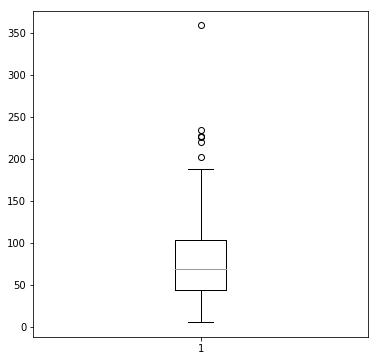

In [128]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.boxplot(box_data.text_len)
plt.show()

In [129]:
data.where(col('text_len') > 150).show()

+---------+--------------------+--------+
|sentiment|                text|text_len|
+---------+--------------------+--------+
|        4|5 days till new t...|     359|
|        4|Thriving Ivory's ...|     235|
|        4|BROOKE - &quot;fr...|     227|
|        4|@LyNn_4 &quot;Hum...|     226|
|        4|I know pi to 12 d...|     220|
|        4|@curiousillusion ...|     202|
|        0|so 3.0 update cha...|     188|
|        4|@antiprism &quot;...|     188|
|        0|Maybe it's just m...|     186|
|        4|#MusicMonday &quo...|     182|
|        0|I love that he &q...|     182|
|        4|@Jonasbrothers I ...|     182|
|        4|Today's &quot;lon...|     181|
|        0|Raining steady in...|     181|
|        0|@matsuma &quot;un...|     180|
|        4|&quot;Can I have ...|     179|
|        4|@MGiraudOfficial ...|     178|
|        4|@doax 어차피 bandwid...|     178|
|        4|Got my &quot;Stim...|     178|
|        4|Can common/drone ...|     178|
+---------+--------------------+--

In [132]:
data.filter(data.text.like('http%')).select('text').show()

+--------------------+
|                text|
+--------------------+
|http://bit.ly/hJE...|
|http://ping.fm/LZ...|
|http://twitpic.co...|
|http://twitpic.co...|
|http://tinyurl.co...|
|http://twitpic.co...|
|http://twitpic.co...|
|http://digg.com/u...|
|http://3mix.com/~...|
|http://digg.com/u...|
|http://bit.ly/tHy...|
|http://twitpic.co...|
|http://twitpic.co...|
|http://yfrog.com/...|
|http://twitpic.co...|
|http://www.mattma...|
|http://www.lankaj...|
|http://twitpic.co...|
|http://twitpic.co...|
|http://twitpic.co...|
+--------------------+
only showing top 20 rows



# HTML Formatting

In [24]:
from bs4 import BeautifulSoup

In [145]:
html_text = data.filter(data.text.like('%quot%')).select('text').first().text

In [146]:
html_text

"Thriving Ivory's song &quot;Twilight&quot; &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt; the other Twilight "

In [147]:
BeautifulSoup(html_text, 'lxml')

<html><body><p>Thriving Ivory's song "Twilight" &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt; the other Twilight </p></body></html>

In [148]:
BeautifulSoup(html_text, 'lxml').get_text()

'Thriving Ivory\'s song "Twilight" >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> the other Twilight '

# Removing Mentioning (@)

In [149]:
mentioning_text = data.filter(data.text.like('%@%')).select('text').first().text

In [152]:
mentioning_text

'@LyNn_4 &quot;Human,&quot; &quot;Rehab,&quot; &quot;Sex On Fire,&quot; &quot;So What,&quot; &quot;Reach Out,&quot; &quot;Womanizer,&quot; &quot;Keeps Getting Better,&quot; &quot;Love Lockdown&quot; &amp; &quot;Not Fair.&quot; '

In [153]:
import re

In [156]:
re.sub(pattern=r'@[A-Za-z0-9_]+', repl='', string=mentioning_text)

' &quot;Human,&quot; &quot;Rehab,&quot; &quot;Sex On Fire,&quot; &quot;So What,&quot; &quot;Reach Out,&quot; &quot;Womanizer,&quot; &quot;Keeps Getting Better,&quot; &quot;Love Lockdown&quot; &amp; &quot;Not Fair.&quot; '

# Removing HTML

In [158]:
http_text = data.filter(data.text.like('%http%')).select('text').first().text

In [178]:
http_text += 'www.someaddress.ca/?super@sign^/'

In [180]:
http_text

'listening vi @Gaz50: &quot;@scotlandlover, Its only 12.22 ere  &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt; Time(Clock of the heart).........Culture ... ♫ http://blip.fm/~7plt5www.someaddress.ca/?super@sign^/'

In [179]:
re.sub(pattern=r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', repl='', string=http_text)

'listening vi @Gaz50: &quot;@scotlandlover, Its only 12.22 ere  &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt; Time(Clock of the heart).........Culture ... ♫ '

In [163]:
https_text = data.filter(data.text.like('%https%')).select('text').first().text

In [164]:
https_text

"I go to &quot;User Experience Roundtable Hamburg - Detlev Fischer on Accessibility, BITV Test&quot; https://www.xing.com/events/333622 Don't miss! "

In [165]:
re.sub(pattern=r'https?://[A-Za-z0-9./]+', repl='', string=https_text)

"I go to &quot;User Experience Roundtable Hamburg - Detlev Fischer on Accessibility, BITV Test&quot;  Don't miss! "

# Removing Byte Order Marks

In [170]:
bom_text = data.filter(data.text.like('%\'ll%')).select('text').first().text

In [173]:
re.sub(r'\'ll', ' will', bom_text)

'&quot;I will see you again yeah?&quot; &quot;Its up to you&quot; &quot;I guarantee you will, i dont want to wait to long not seeing you&quot; fuckin fruit basket! Hahaha '

# Remove data that is neither numerical nor alphabetical

In [181]:
hashtag_text = data.filter(data.text.like('%#%')).select('text').first().text

In [182]:
hashtag_text

"#MusicMonday &quot;I love you&quot; Faith Evans....&quot;Something That I Like&quot; Ryan Leslie.....Mario &quot;Good One&quot;....&amp; &quot;He Ain't Wit Me Now Tho&quot; Richgirl "

In [187]:
re.sub(pattern=r'[^A-Za-z0-9]', repl=' ', string=hashtag_text)

' MusicMonday  quot I love you quot  Faith Evans     quot Something That I Like quot  Ryan Leslie     Mario  quot Good One quot      amp   quot He Ain t Wit Me Now Tho quot  Richgirl '

# Summary of the previous method and data cleaning

In [17]:
import re
from nltk.tokenize import WordPunctTokenizer

In [13]:
tokenizer = WordPunctTokenizer()

In [31]:
mention_pat = r'@[A-Za-z0-9_]+'
url_pat = r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*'
negation_dict = {
    "isn't": "is not",
    "aren't": "are not",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "haven't": "have not",
    "hasn't": "has not",
    "mustn't": "must not",
    "wasn't": "was not",
    "weren't": "were not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "can't": "can not",
    "couldn't": "could not",
    "shouldn't": "should not",
    "mightn't": "might not",
}
full_pat = r'|'.join([mention_pat, url_pat])

In [32]:
full_pat

'@[A-Za-z0-9_]+|\\w+:\\/{2}[\\d\\w-]+(\\.[\\d\\w-]+)*(?:(?:\\/[^\\s/]*))*'

In [33]:
neg_pattern = re.compile(r'\b(' + '|'.join(negation_dict.keys()) + r')\b')

In [34]:
neg_pattern

re.compile(r"\b(isn't|aren't|don't|doesn't|didn't|haven't|hasn't|mustn't|wasn't|weren't|hadn't|won't|wouldn't|can't|couldn't|shouldn't|mightn't)\b",
re.UNICODE)

In [40]:
def text_cleaner(text):
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub(pattern=full_pat, repl='', string=text)
    text = re.sub(pattern=url_pat, repl='', string=text)
    text = re.sub(r'\'ll', ' will', text)
    text = re.sub(r'\'ve', ' have', text)
    text = text.lower()
    text = neg_pattern.sub(lambda x: negation_dict[x.group()], text)
    text = re.sub(pattern=r'[^A-Za-z]', repl=' ', string=text) # letters only
    words = [x for x in tokenizer.tokenize(text) if len(x) > 0]
    return (' '.join(words)).strip()

In [37]:
from pyspark.sql.functions import udf

In [41]:
txt_cleaner_udf = udf(lambda text: text_cleaner(text), StringType())

In [198]:
data.show()

+---------+--------------------+--------+
|sentiment|                text|text_len|
+---------+--------------------+--------+
|        4|5 days till new t...|     359|
|        4|Thriving Ivory's ...|     235|
|        4|BROOKE - &quot;fr...|     227|
|        4|@LyNn_4 &quot;Hum...|     226|
|        4|I know pi to 12 d...|     220|
|        4|@curiousillusion ...|     202|
|        4|@antiprism &quot;...|     188|
|        0|so 3.0 update cha...|     188|
|        0|Maybe it's just m...|     186|
|        4|#MusicMonday &quo...|     182|
|        0|I love that he &q...|     182|
|        4|@Jonasbrothers I ...|     182|
|        4|Today's &quot;lon...|     181|
|        0|Raining steady in...|     181|
|        0|@matsuma &quot;un...|     180|
|        4|&quot;Can I have ...|     179|
|        4|Can common/drone ...|     178|
|        4|Got my &quot;Stim...|     178|
|        0|&quot;i leave you...|     178|
|        4|@MGiraudOfficial ...|     178|
+---------+--------------------+--

In [43]:
data = data.select('sentiment', 'text', txt_cleaner_udf('text').alias('clean'))

In [44]:
data.show()

+---------+--------------------+--------------------+
|sentiment|                text|               clean|
+---------+--------------------+--------------------+
|        0|@switchfoot http:...|awww that s a bum...|
|        0|is upset that he ...|is upset that he ...|
|        0|@Kenichan I dived...|i dived many time...|
|        0|my whole body fee...|my whole body fee...|
|        0|@nationwideclass ...|no it s not behav...|
|        0|@Kwesidei not the...|  not the whole crew|
|        0|         Need a hug |          need a hug|
|        0|@LOLTrish hey  lo...|hey long time no ...|
|        0|@Tatiana_K nope t...|nope they did not...|
|        0|@twittera que me ...|        que me muera|
|        0|spring break in p...|spring break in p...|
|        0|I just re-pierced...|i just re pierced...|
|        0|@caregiving I cou...|i could not bear ...|
|        0|@octolinz16 It it...|it it counts idk ...|
|        0|@smarrison i woul...|i would have been...|
|        0|@iamjazzyfizzle I

In [47]:
data = data.select('sentiment', col('clean').alias('text'))

In [48]:
data.write.parquet("clean_tweets.parquet")